<a href="https://colab.research.google.com/github/arkadeepsadhukhan-sketch/arkaD-ARIMA/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.26.4
!pip install pmdarima==2.0.4

In [ ]:
import pandas as pd
df=pd.read_csv('/content/TATAMOTORS.csv',index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (251, 5)


/tmp/ipython-input-3312310180.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df=pd.read_csv('/content/TATAMOTORS.csv',index_col='Date'   ,parse_dates=True)


,Open,High,Low,Last,Close
Date,,,,,
2020-04-30,85.95,93.75,85.95,93.75,93.25
2020-05-04,87.00,87.20,81.50,84.05,83.90
2020-05-05,86.00,86.80,80.40,81.00,80.90
2020-05-06,81.55,83.95,80.35,83.70,83.20
2020-05-07,82.90,84.65,82.10,82.55,82.50
...,...,...,...,...,...
2021-04-26,297.00,299.00,294.60,295.85,295.40
2021-04-27,295.70,302.50,295.10,302.10,301.50
2021-04-28,303.50,309.50,303.00,305.15,305.90


<Axes: xlabel='Date'>

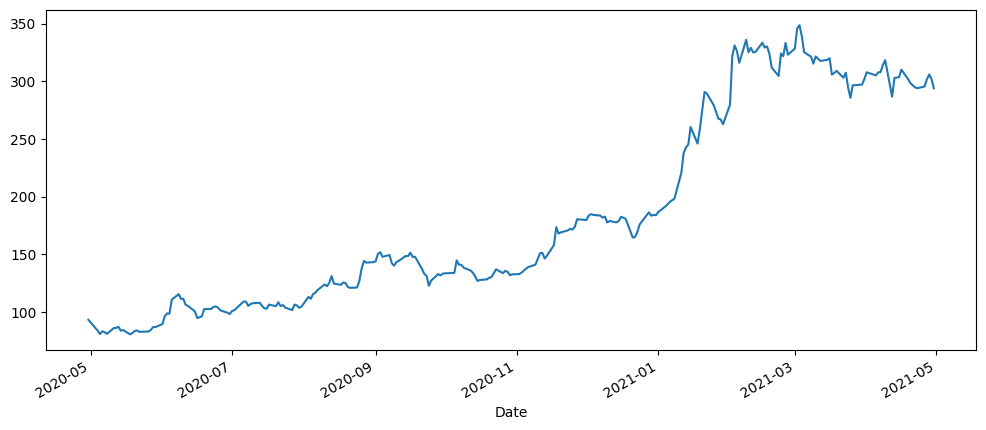

In [ ]:
df['Close'].plot(figsize=(12,5))

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['Close'])

1. ADF :  -0.848517870382646
2. P-Value :  0.8044534190310029
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression: 239
5. Critical Values :
	 1% :  -3.458010773719797
	 5% :  -2.8737103617125186
	 10% :  -2.5732559963936206


We are looking for a p-value less than 5% or 0.05

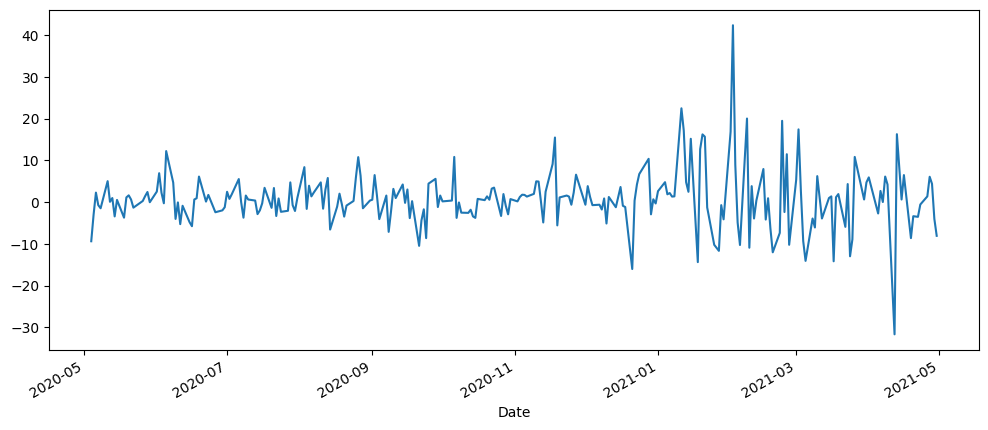

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_differenced_series(series):
    ds = series.diff().dropna()
    ds.plot(figsize=(12,5))
    return ds

d1=plot_differenced_series(df['Close'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(d1)
p_value = adf_result[1]

print(f"P-value: {p_value}")


P-value: 0.00471130619397578


The above p-value is acceptable and thus d value can be taken as 1 while on further differencing the data becomes more stationary.

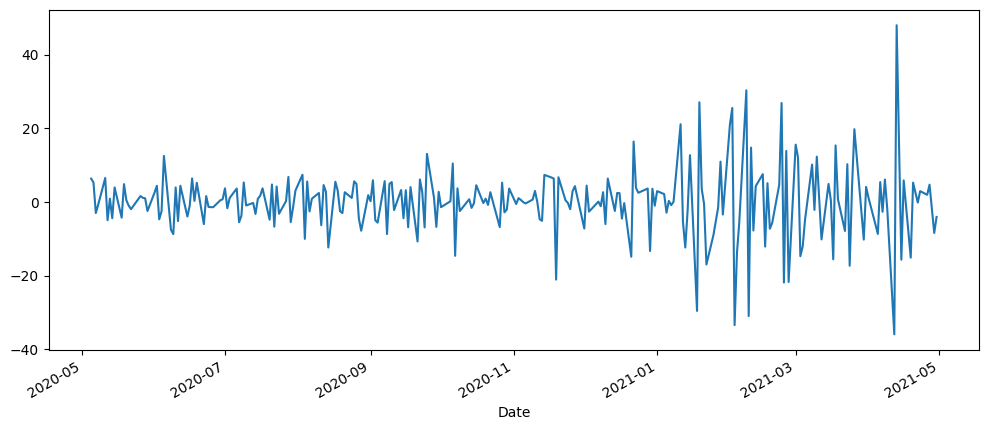

In [ ]:
d2=plot_differenced_series(d1)

To deteremine the AR(q) term, we need to run the pacf test

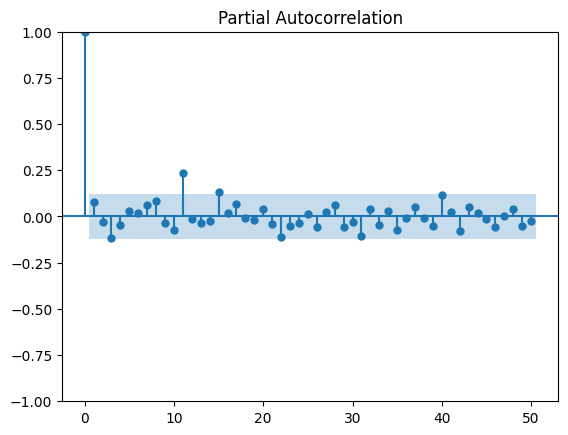

In [101]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(d1, lags=50)
plt.show()

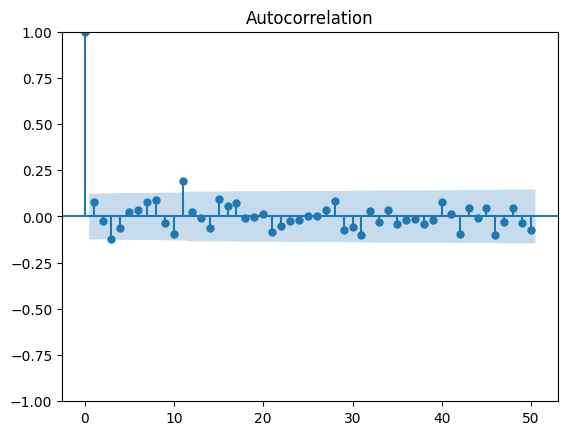

In [100]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(d1, lags=50)
plt.show()

In [108]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1675.258, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1674.556, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1675.077, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1675.019, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1675.977, Time=0.02 sec


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1677.016, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.853 seconds


In [124]:
print(df.shape)
train=df.iloc[:-5]
test=df.iloc[-5:]
print(train.shape,test.shape)

(251, 5)
(246, 5) (5, 5)


In [125]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Close'],order=(11,1,3))
model=model.fit()
model.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  246
Model:                ARIMA(11, 1, 3)   Log Likelihood                -805.520
Date:                Wed, 27 Aug 2025   AIC                           1641.039
Time:                        21:05:16   BIC                           1693.558
Sample:                             0   HQIC                          1662.189
                                - 246                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4763      0.156     -3.056      0.002      -0.782      -0.171
ar.L2         -0.4947      0.152     -3.256      0.001      -0.793      -0.197
ar.L3         -0.6506      0.173     -3.755      0.000      -0.990      -0.311
ar.L4         -0.0382      0.070     -0.542      0.588      -0.176       0.100
ar.L5         -0.0082      0.065     -0.126      0.900      -0.135       0.119
ar.L6         -0.0277      0.076     -0.366      0.715      -0.176       0.121
ar.L7          0.0946      0.074      1.273      0.203      -0.051       0.240
ar.L8          0.1846      0.080      2.310      0.021       0.028       0.341
ar.L9          0.0962      0.082      1.168      0.243      -0.065       0.258
ar.L10        -0.0264      0.073     -0.362      0.717      -0.169       0.116
ar.L11         0.2390      0.076      3.148      0.002       0.090       0.388
ma.L1          0.5942      0.163      3.645      0.000       0.275       0.914
ma.L2          0.5782      0.161      3.587      0.000       0.262       0.894
ma.L3          0.6478      0.170      3.815      0.000       0.315       0.981
sigma2        41.7255      2.905     14.363      0.000      36.032      47.419
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               190.21
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               6.59   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [126]:
start=len(train)+1
end=len(train)+len(test)
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
print(pred)

247    295.327528
248    299.580265
249    289.600291
250    293.667406
251    292.050947
Name: ARIMA Predictions, dtype: float64


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

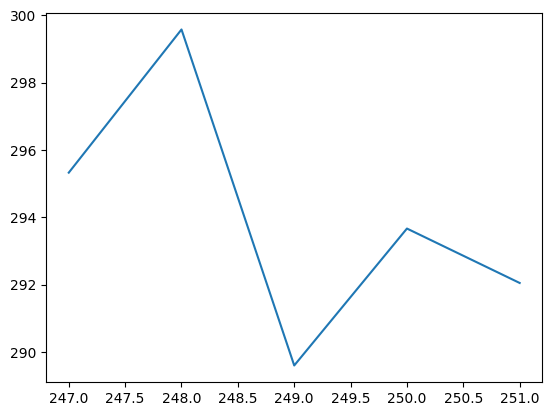

In [127]:
pred.plot()


<Axes: xlabel='Date'>

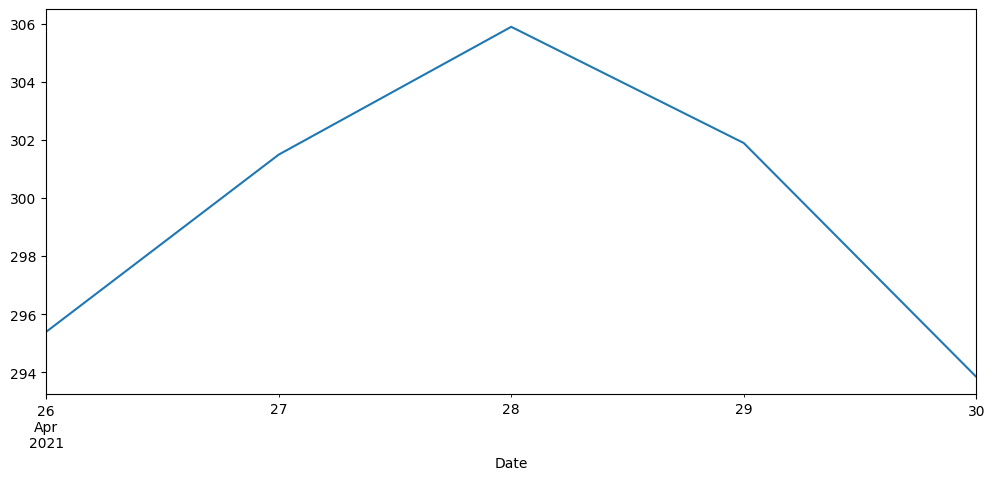

In [128]:
df[246:251]['Close'].plot(figsize=(12,5))